## (Varun Taneja - Major Project Machine Learning)

# PROBLEM STATEMENT:
The sinking of the RMS Titanic is one of the most infamous shipwrecks in
history. On April 15, 1912, during her maiden voyage, the Titanic sank after
colliding with an iceberg, killing numerous passengers and crew. This
sensational tragedy shocked the international community and led to better
safety regulations for ships.
One of the reasons that the shipwreck led to such loss of life was that there
were not enough lifeboats for the passengers and crew. Although there was
some element of luck involved in surviving the sinking, some groups of people
were more likely to survive than others, such as women, children, and the
upper-class.
In this, we ask you to complete the analysis of what sorts of people were likely
to survive. In particular, we ask you to apply the tools of machine learning to
predict which passengers survived the tragedy

### Importing the libraries required 

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
df = pd.read_csv('TITANIC.csv.txt')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Removing the columns that aren't going to affect our ojective 

In [7]:
df.drop('Cabin', axis = 1, inplace =True )
df.drop('PassengerId', axis = 1, inplace =True )
df.drop('Name', axis = 1, inplace =True )
df.drop('Ticket', axis = 1, inplace =True )



In [8]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [10]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Treating the null values 

In [11]:
df['Age'] = df['Age'].fillna(value = df['Age'].median())
#null values of age have been filled

In [12]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [13]:
df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [14]:
df['Embarked'] = df['Embarked'].fillna('S')

In [15]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

There are no null values left in any column.

### Treating the outliers in variables

In [16]:
IQR_age = df['Age'].quantile(0.75)-df['Age'].quantile(0.25)
Upper_OutlierLimit_age = df['Age'].quantile(0.75) + 1.5*IQR_age
Lower_OutlierLimit_age = df['Age'].quantile(0.25) - 1.5*IQR_age
OutlierValues_age = df[(df['Age']>=Upper_OutlierLimit_age) | (df['Age']<=Lower_OutlierLimit_age)]


In [17]:
for i in range(0,891):
    if df['Age'][i] >= Upper_OutlierLimit_age:
        df['Age'][i] = Upper_OutlierLimit_age
    elif df['Age'][i] <= Lower_OutlierLimit_age:
        df['Age'][i] = Lower_OutlierLimit_age
    else:     
        continue

<ipython-input-17-1e0911ca040e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'][i] = Lower_OutlierLimit_age
<ipython-input-17-1e0911ca040e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'][i] = Upper_OutlierLimit_age


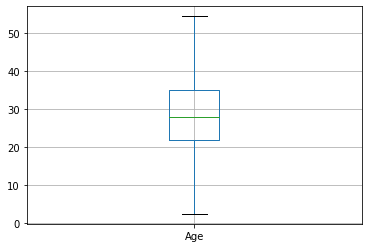

In [18]:
df.boxplot(column=['Age'])

In [19]:
IQR_fare= df['Fare'].quantile(0.75)-df['Fare'].quantile(0.25)
Upper_OutlierLimit_fare = df['Fare'].quantile(0.75) + 1.5*IQR_fare
Lower_OutlierLimit_fare = df['Fare'].quantile(0.25) - 1.5*IQR_fare
OutlierValues_fare = df[(df['Fare']>=Upper_OutlierLimit_fare) | (df['Fare']<=Lower_OutlierLimit_fare)]

In [20]:
for i in range(0,891):
    if df['Fare'][i] >= Upper_OutlierLimit_fare:
        df['Fare'][i] = Upper_OutlierLimit_fare
    elif df['Fare'][i] <= Lower_OutlierLimit_fare:
        df['Fare'][i] = Lower_OutlierLimit_fare
    else:     
        continue

<ipython-input-20-24f1b390573e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Fare'][i] = Upper_OutlierLimit_fare


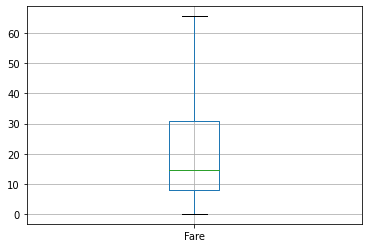

In [21]:
df.boxplot(column=['Fare'])

In [22]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,65.6344,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,28.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


## Creating dummy variables and converting features

In [23]:
df['Fare']= df['Fare'].astype(int)
df['Age']= df['Age'].astype(int)

In [24]:
obj = df.dtypes == np.object
df.columns[obj]
dummydf = pd.DataFrame()

for i in df.columns[obj]:
    dummy=pd.get_dummies(df[i],drop_first=True)
    dummydf=pd.concat([dummydf, dummy], axis=1)
    
df1=pd.concat([df,dummydf],axis=1)
df1

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,male,Q,S
0,0,3,male,22,1,0,7,S,1,0,1
1,1,1,female,38,1,0,65,C,0,0,0
2,1,3,female,26,0,0,7,S,0,0,1
3,1,1,female,35,1,0,53,S,0,0,1
4,0,3,male,35,0,0,8,S,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27,0,0,13,S,1,0,1
887,1,1,female,19,0,0,30,S,0,0,1
888,0,3,female,28,1,2,23,S,0,0,1
889,1,1,male,26,0,0,30,C,1,0,0


In [25]:
df1.drop('Sex', axis=1, inplace=True)
df1.drop('Embarked', axis=1, inplace=True)

In [26]:
df1

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22,1,0,7,1,0,1
1,1,1,38,1,0,65,0,0,0
2,1,3,26,0,0,7,0,0,1
3,1,1,35,1,0,53,0,0,1
4,0,3,35,0,0,8,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27,0,0,13,1,0,1
887,1,1,19,0,0,30,0,0,1
888,0,3,28,1,2,23,0,0,1
889,1,1,26,0,0,30,1,0,0


In [27]:
df1['Relatives'] = df1['SibSp'] + df1['Parch']

In [28]:
df1

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,Relatives
0,0,3,22,1,0,7,1,0,1,1
1,1,1,38,1,0,65,0,0,0,1
2,1,3,26,0,0,7,0,0,1,0
3,1,1,35,1,0,53,0,0,1,1
4,0,3,35,0,0,8,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
886,0,2,27,0,0,13,1,0,1,0
887,1,1,19,0,0,30,0,0,1,0
888,0,3,28,1,2,23,0,0,1,3
889,1,1,26,0,0,30,1,0,0,0


In [29]:
df1.drop('SibSp', axis=1, inplace=True)
df1.drop('Parch', axis=1, inplace=True)

In [30]:
df1

,Survived,Pclass,Age,Fare,male,Q,S,Relatives
0,0,3,22,7,1,0,1,1
1,1,1,38,65,0,0,0,1
2,1,3,26,7,0,0,1,0
3,1,1,35,53,0,0,1,1
4,0,3,35,8,1,0,1,0
...,...,...,...,...,...,...,...,...
886,0,2,27,13,1,0,1,0
887,1,1,19,30,0,0,1,0
888,0,3,28,23,0,0,1,3
889,1,1,26,30,1,0,0,0


In [31]:
for i in range(0,891):
    if df1['Age'][i]<= 11:
        df1['Age'][i] = 0
    elif (df1['Age'][i] <= 18):
        df1['Age'][i] = 1
    elif (df1['Age'][i] <= 22):
        df1['Age'][i] = 2
    elif (df1['Age'][i] <= 27):
        df1['Age'][i] = 3
    elif (df1['Age'][i] <= 33):
        df1['Age'][i] = 4
    elif (df1['Age'][i] <= 40):
        df1['Age'][i] = 5
    elif (df1['Age'][i] <= 66):
        df1['Age'][i] = 6
    else:
        df1['Age'][i] = 7
    
# let's see how it's distributed train_df['Age'].value_counts()

<ipython-input-31-abf3a70719d5>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Age'][i] = 2
<ipython-input-31-abf3a70719d5>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Age'][i] = 5
<ipython-input-31-abf3a70719d5>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Age'][i] = 3
<ipython-input-31-abf3a70719d5>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the cavea

In [32]:
df1.tail(40)

,Survived,Pclass,Age,Fare,male,Q,S,Relatives
851,0,3,6,7,1,0,1,0
852,0,3,0,15,0,0,0,2
853,1,1,1,39,0,0,1,1
854,0,2,6,26,0,0,1,1
855,1,3,1,9,0,0,1,1
856,1,1,6,65,0,0,1,2
857,1,1,6,26,1,0,1,0
858,1,3,3,19,0,0,0,3
859,0,3,4,7,1,0,0,0
860,0,3,6,14,1,0,1,2


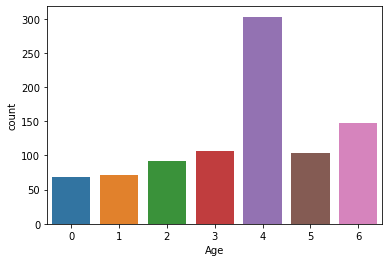

In [33]:
sns.countplot(x='Age', data=df1)

In [34]:
for i in range(0,891):
    if df1['Fare'][i]<= 8:
        df1['Fare'][i] = 0
    elif (df1['Fare'][i] <= 14):
        df1['Fare'][i] = 1
    elif (df1['Fare'][i] <= 30):
        df1['Fare'][i] = 2
    elif (df1['Fare'][i] <= 50):
        df1['Fare'][i] = 3
    else:
        df1['Fare'][i] = 4

<ipython-input-34-aa131b9675e4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Fare'][i] = 0
<ipython-input-34-aa131b9675e4>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Fare'][i] = 4
<ipython-input-34-aa131b9675e4>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Fare'][i] = 2
<ipython-input-34-aa131b9675e4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the cav

In [35]:
df1

,Survived,Pclass,Age,Fare,male,Q,S,Relatives
0,0,3,2,0,1,0,1,1
1,1,1,5,4,0,0,0,1
2,1,3,3,0,0,0,1,0
3,1,1,5,4,0,0,1,1
4,0,3,5,0,1,0,1,0
...,...,...,...,...,...,...,...,...
886,0,2,3,1,1,0,1,0
887,1,1,2,2,0,0,1,0
888,0,3,4,2,0,0,1,3
889,1,1,3,2,1,0,0,0


## Defining X & Y and Splitting the Datasheet

In [36]:
from sklearn.model_selection import train_test_split

#Split the data into independent 'X' and dependent 'Y' variables
X = df1.iloc[:, 1:7].values 
Y = df1.iloc[:, 0].values

train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.25, random_state=0)

In [37]:
train_X.shape



(668, 6)

In [38]:
test_X.shape


(223, 6)

In [39]:
train_Y.shape

(668,)

In [40]:
test_Y.shape

(223,)

In [41]:
train_Y

array([0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,

In [42]:
test_Y

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1], dtype=int64)

In [43]:
train_X

array([[3, 4, 0, 1, 0, 1],
       [3, 1, 0, 0, 0, 1],
       [3, 4, 2, 1, 0, 1],
       ...,
       [3, 4, 0, 1, 1, 0],
       [3, 5, 2, 0, 0, 1],
       [2, 6, 3, 1, 0, 1]], dtype=int64)

In [44]:
test_X

array([[3, 4, 1, 1, 0, 0],
       [3, 4, 0, 1, 0, 1],
       [3, 0, 2, 1, 1, 0],
       ...,
       [3, 2, 0, 1, 0, 1],
       [1, 2, 4, 0, 0, 0],
       [3, 0, 2, 0, 0, 1]], dtype=int64)

## Building and Evaluating the model

### 1)Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(train_X, train_Y)

LogisticRegression()

In [46]:
Y_pred_lr = lr.predict(test_X)

In [47]:
test_Y

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1], dtype=int64)

In [48]:
Y_pred_lr

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1], dtype=int64)

#### Model Evaluation - 

In [49]:
from sklearn.metrics import classification_report
print(classification_report(test_Y,Y_pred_lr))

              precision    recall  f1-score   support

           0       0.84      0.83      0.84       139
           1       0.73      0.74      0.73        84

    accuracy                           0.80       223
   macro avg       0.78      0.79      0.79       223
weighted avg       0.80      0.80      0.80       223



### 2)K Nearest Neighbour

In [50]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(train_X, train_Y)

KNeighborsClassifier()

In [51]:
Y_pred_knn = knn.predict(test_X)

In [52]:
Y_pred_knn

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0], dtype=int64)

#### Model Evaluation - 

In [53]:
from sklearn.metrics import classification_report
print(classification_report(test_Y,Y_pred_knn))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       139
           1       0.75      0.65      0.70        84

    accuracy                           0.79       223
   macro avg       0.78      0.76      0.77       223
weighted avg       0.79      0.79      0.79       223



### 3) Desicion Tree 

In [54]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(train_X, train_Y)

DecisionTreeClassifier()

In [55]:
Y_pred_tree = tree.predict(test_X)

In [56]:
Y_pred_tree

array([1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0], dtype=int64)

#### Model Evaluation - 


In [57]:
from sklearn.metrics import classification_report
print(classification_report(test_Y,Y_pred_tree))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       139
           1       0.81      0.68      0.74        84

    accuracy                           0.82       223
   macro avg       0.82      0.79      0.80       223
weighted avg       0.82      0.82      0.82       223



### 4) Random Forest

In [58]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(random_state = 0)
forest.fit(train_X, train_Y)

RandomForestClassifier(random_state=0)

In [59]:
Y_pred_rf = forest.predict(test_X)

In [60]:
Y_pred_rf

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0], dtype=int64)

#### Model Evaluation- 

In [61]:
from sklearn.metrics import classification_report
print(classification_report(test_Y,Y_pred_rf))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       139
           1       0.82      0.69      0.75        84

    accuracy                           0.83       223
   macro avg       0.82      0.80      0.81       223
weighted avg       0.82      0.83      0.82       223



### 5) Heirarchial Clustering analysis

In [62]:
from sklearn.cluster import AgglomerativeClustering
hcl = AgglomerativeClustering()
Y_pred_hcl = hcl.fit_predict(test_X)

In [63]:
Y_pred_hcl

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1], dtype=int64)

#### Model evaluation 

In [64]:
from sklearn.metrics import classification_report
print(classification_report(test_Y,Y_pred_hcl))

              precision    recall  f1-score   support

           0       0.62      0.75      0.68       139
           1       0.35      0.23      0.28        84

    accuracy                           0.55       223
   macro avg       0.48      0.49      0.48       223
weighted avg       0.52      0.55      0.52       223



# Conclusion

**In lieu of the Major Project we followed this procedure-**

1) Importing the libraries required.

2) Removing the columns that aren't going to affect our ojective.

3) Treating the null values.

4) Treating the outliers in variables.

5) Creating dummy variables and converting features.

6) Defining X & Y and Splitting the Datasheet.

7) Building and Evaluating the model by various techniques. - **Logistic Regression, K Nearest Neighbour, Desicion Tree,
   Random Forest, Heirarchial Clustering analysis.**
   
   



**The last step is comparing the accuracy of these 5 Techniques and find the best suited for the objective we cant to carry out:**

**Logistic Regression** = accuracy is **80%**

**K Nearest Neighbour** = accuracy is **79%**

**Desicion Tree** = accuracy is **82%**

**Random Forest** = accuracy is **83%**

**Heirarchial Clustering analysis** = accuracy is **55%**


## Therefore the most accurate is Random Forest with a accuracy of 83% 